# <u><b><i><center>DAP PROJECT - Analysing 2023 Stack Overflow Survey Results </center></i></b></u>

In [2]:
import pandas as pd
from pandas import read_csv
import seaborn as sns 
import matplotlib.pyplot as plt
import operator
import re

pd.set_option('display.max_columns', 90)

## -- <i>DATA FILE SETTING UP AND CONFIGURATION</i> -- 


In [21]:
schema = read_csv('survey_results_schema.csv')
data = read_csv('survey_results_public.csv')

data.set_index('ResponseId', inplace=True)
data.rename(columns = {'CompTotal': 'Salary'}, inplace=True)

In [78]:
# DROP & CLEAN
# data.drop(columns=['Q120'], inplace=True)

### <i>*- Educations level of candidates who participated in survey -*</i>

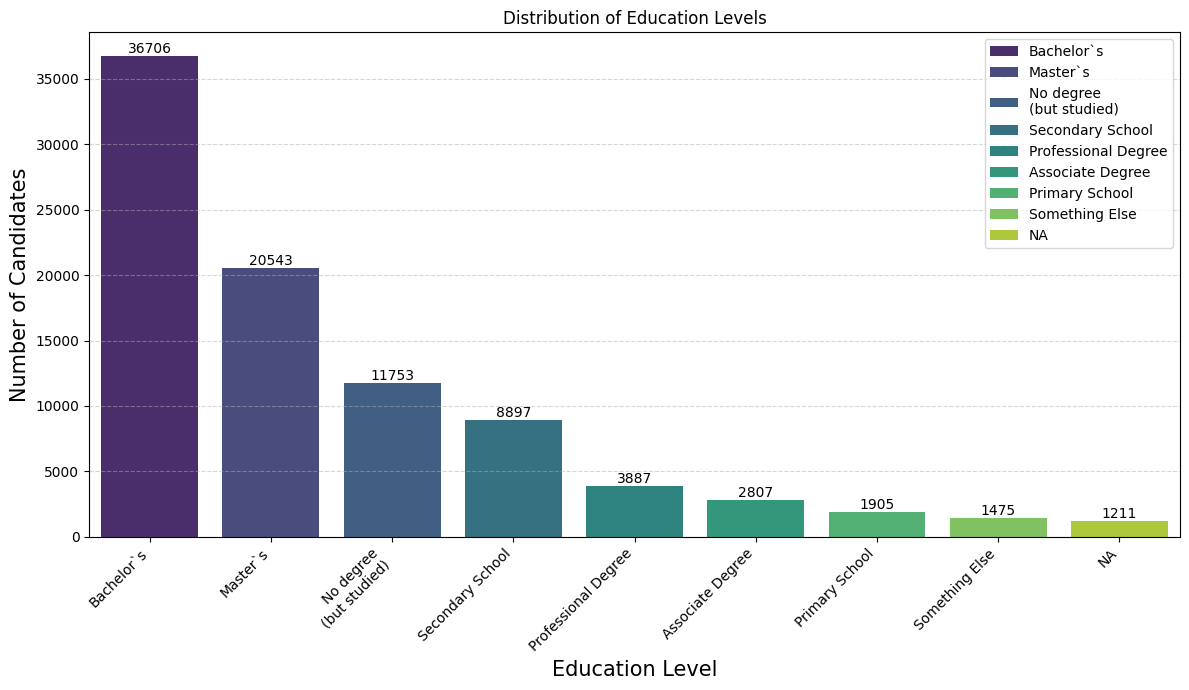

In [15]:
# data['EdLevel'].unique()
educationCounts = {}

data['EdLevel'].fillna("NA", inplace=True)

educationCounts = {}
for i in data['EdLevel']:
    educationCounts[i] = educationCounts.get(i, 0) + 1

# Sorting Dictionary
educationCounts = sorted(educationCounts.items(), key=operator.itemgetter(1), reverse=True)

levels, counts = zip(*educationCounts)

# Custom labels for better readability
custom_labels = ['Bachelor`s',
                 'Master`s',
                 'No degree\n(but studied)',
                 'Secondary School',
                 'Professional Degree',
                 'Associate Degree',
                 'Primary School',
                 'Something Else',
                 'NA']

# Create a Seaborn bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=custom_labels, y=counts, hue=custom_labels, palette="viridis", dodge=False, legend=True)

# Adding data labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel("Education Level", fontsize=15)
plt.ylabel("Number of Candidates", fontsize=15)
plt.title("Distribution of Education Levels")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

> <b> 
    CONCLUSIONS: 
    Candidates With Bacherlor`s And Master`s degrees are more dominant in survey and seem to be using the platform to a large extent <b>

### <i>*- Age Distributions of Candidates -*</i>

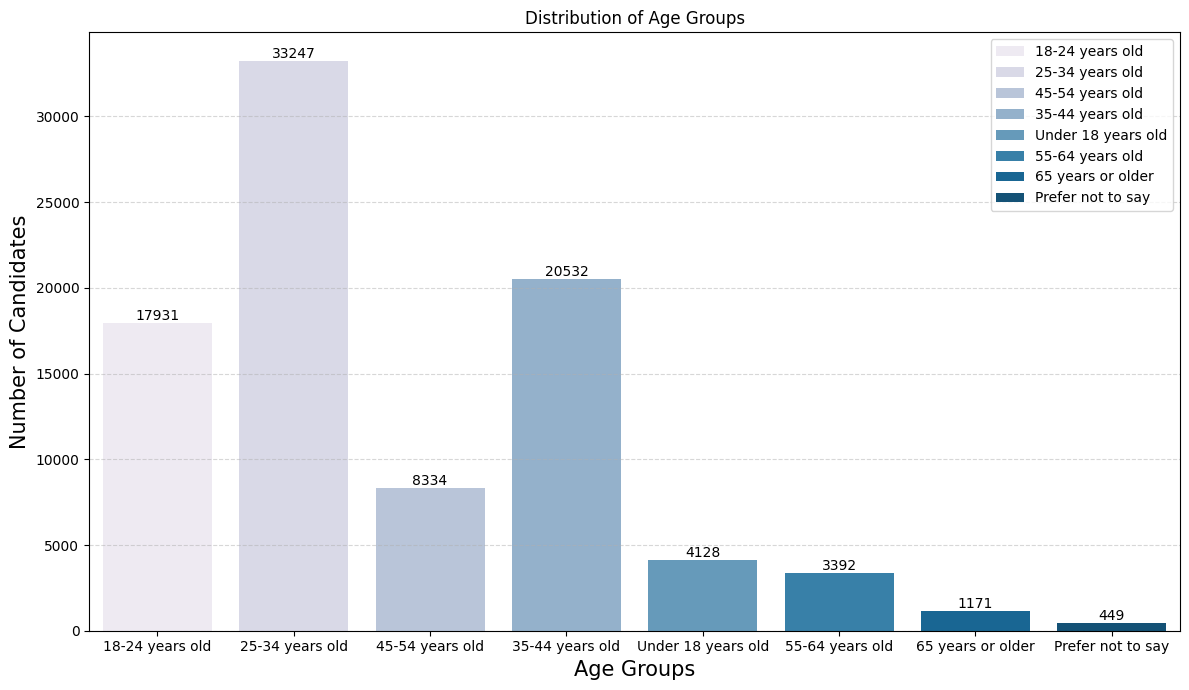

In [17]:
ageDistributions = dict(data['Age'].value_counts(sort=False))
ageRegexPattern = r'^([\d]{2})-([\d]{2})'

# for ageGrp in data['Age']:
#     result = re.search(ageRegexPattern, ageGrp)
#     if result:
#         ages = result.group(0)
#         ageDistributions[ages] = ageDistributions.get(ages, 0) + 1
#     else:
#         pass

# Extracting labels and counts
ageLabels = list(ageDistributions.keys())
counts = list(ageDistributions.values())


# Bar Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=ageLabels, y=counts, hue=ageLabels, palette="PuBu", dodge=False, legend=True)

# Adding data labels on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel("Age Groups", fontsize=15)
plt.ylabel("Number of Candidates", fontsize=15)
plt.title("Distribution of Age Groups")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


> <b>CONCLUSION: </b>

### <i>*- Popularity of Programming Languages or Most used Programming Language in 2023 -*</i>

In [6]:
languages = data['LanguageHaveWorkedWith'].dropna()

# populate dict 
progLangDict = {}
for i in languages:
    splitted = i.split(';')
    for j in splitted:
        progLangDict[j] = progLangDict.get(j, 0) + 1

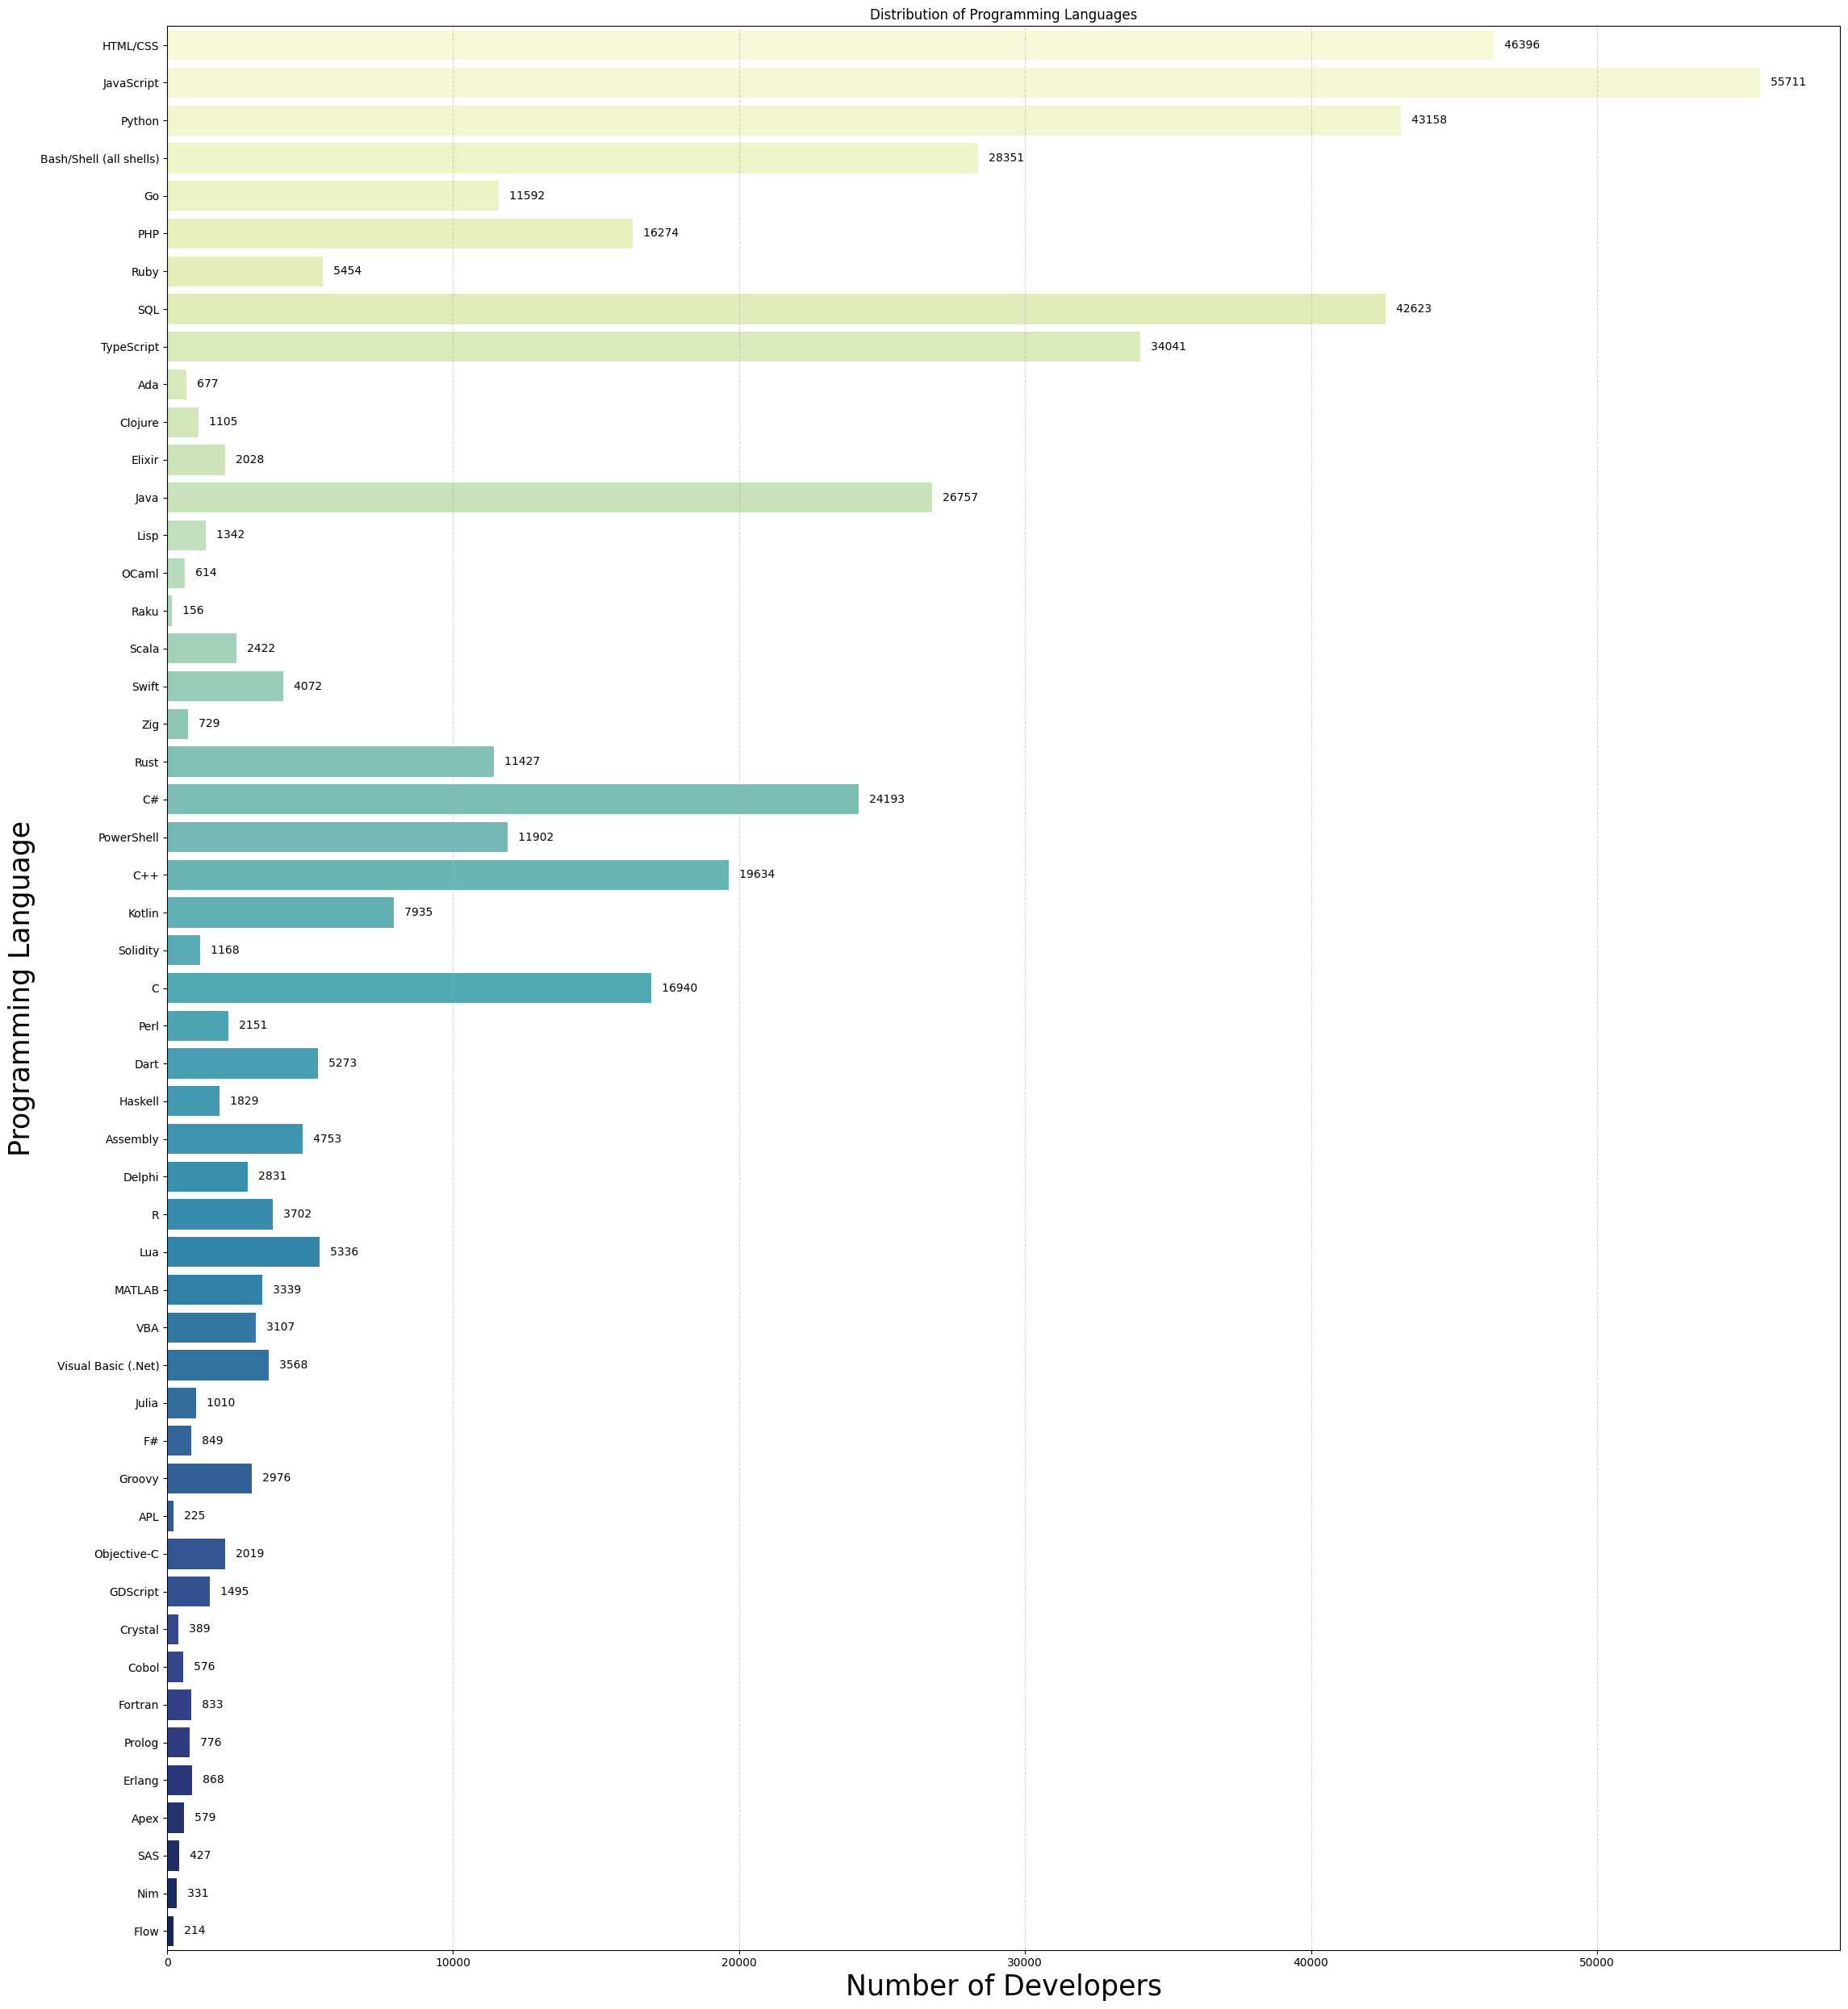

In [20]:
progLanguage = list(progLangDict.keys())
counts = list(progLangDict.values())

plt.figure(figsize=(23, 25))
bar_plot = sns.barplot(x=counts, y=progLanguage, hue=progLanguage, palette="YlGnBu", dodge=False)

# Adding data labels inside the bars
for i, count in enumerate(counts):
    bar_plot.text(count, i, f'   {count}', ha='left', va='center', fontsize=10)

plt.xlabel("Number of Developers", fontsize=25)
plt.ylabel("Programming Language", fontsize=25)
plt.title("Distribution of Programming Languages")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


> <b>CONCLUSION: </b>

### <i>*- Median <strong>Salary</strong> Earned in top paid countries for each designation -*</i>

In [28]:
# Percentage of People Who haven`t disclosed their salary
salaryNotConveyed = (len(data['Salary'].dropna())/len(data['Salary'])) * 100
print(f"{round(salaryNotConveyed, 2)}% have not disclosed their Salary.")

54.07% have not disclosed their Salary.


In [32]:
salaryData = data['Salary'].dropna()
data.groupby('Country')

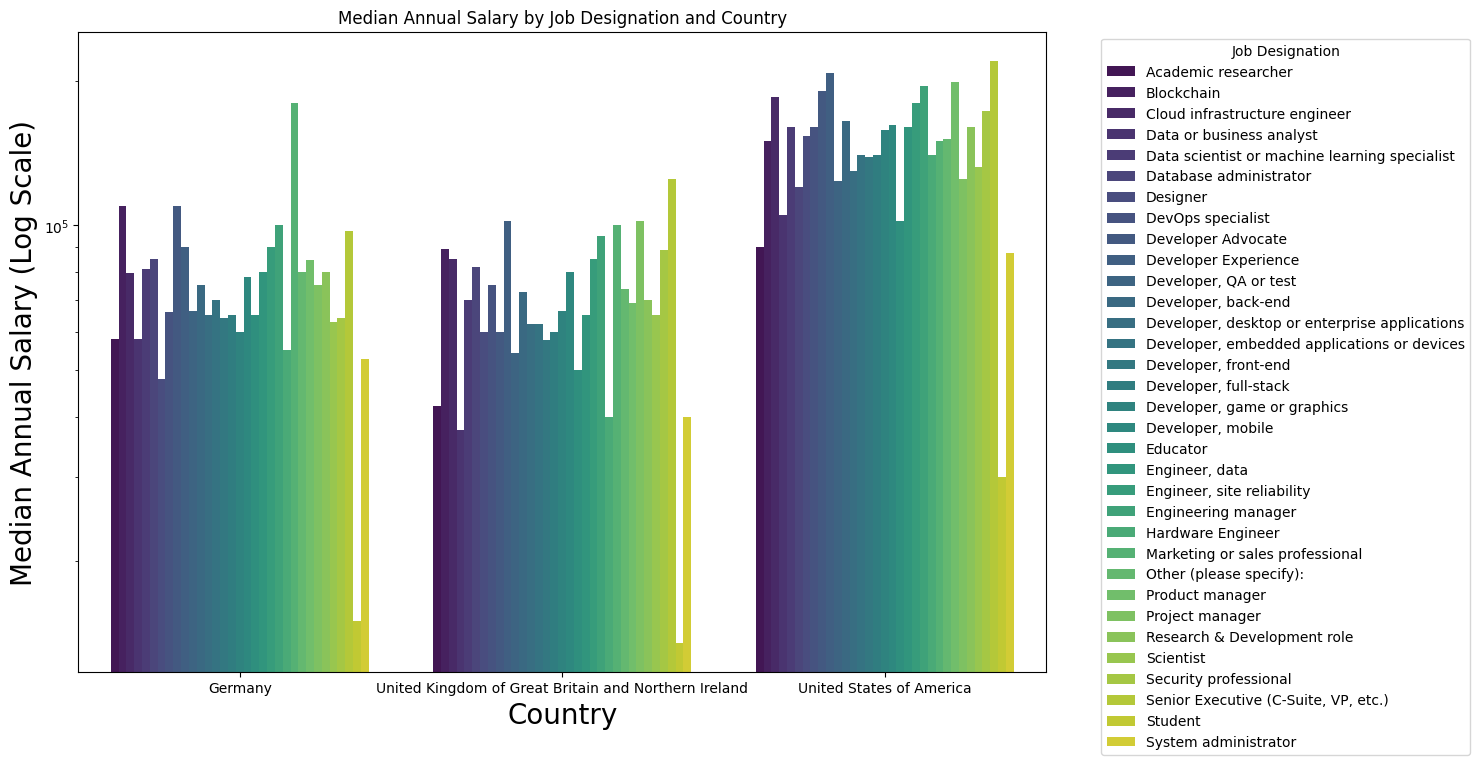

In [62]:
filtered_data = data.dropna(subset=['Salary'])

# Group by Country and DevType
grouped_data = filtered_data.groupby(['Country', 'DevType'])['Salary'].median().reset_index()

# Select top 3 countries better visualization 
top_countries = filtered_data['Country'].value_counts().head(3).index
grouped_data = grouped_data[grouped_data['Country'].isin(top_countries)]


plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Salary', hue='DevType', data=grouped_data, errorbar=None, palette='viridis')
plt.yscale('log')  # Log scale for better visualization of salary differences
plt.xlabel('Country', fontsize=20)
plt.ylabel('Median Annual Salary (Log Scale)', fontsize=20)
plt.title('Median Annual Salary by Job Designation and Country')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Job Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> <b>CONCLUSION: </b>

### -- <i>VIEWING DATA AND ATTRIBUTES</i> --

In [71]:
data.shape

(89184, 83)

In [273]:
data['LearnCode']

ResponseId
1                                                      NaN
2        Books / Physical media;Colleague;Friend or fam...
3        Books / Physical media;Colleague;On the job tr...
4        Colleague;Friend or family member;Other online...
5        Books / Physical media;Online Courses or Certi...
                               ...                        
89180    Online Courses or Certification;Other online r...
89181    Colleague;Online Courses or Certification;Othe...
89182    Books / Physical media;Hackathons (virtual or ...
89183    Online Courses or Certification;Other online r...
89184    Colleague;Online Courses or Certification;Othe...
Name: LearnCode, Length: 89184, dtype: object

In [22]:
len(data.columns), (data.columns)

(83,
 Index(['Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
        'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
        'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
        'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
        'Currency', 'Salary', 'LanguageHaveWorkedWith',
        'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
        'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
        'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
        'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
        'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
        'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
        'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
        'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
        'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
        'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
        'AISearc

In [245]:
data

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,Salary,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Fo